In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk 
import scipy.stats as stats
from datetime import datetime
from utility import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reglage de seaborn
sns.set(
    style='darkgrid',
    context='notebook',
    color_codes=True,
    palette='Paired',
    rc={'figure.figsize':(8,5)}
)

In [3]:
# reduction du nombre de décimale affiché 
pd.options.display.float_format = '{:,.2f}'.format

## Sommaire 

- [Exploration](#Exploration)
- [Nettoyage](#Nettoyage)
- [Analyse](#Analyse)
- [Test statistique](#Test-statistique)

# Exploration des données

## importation des dataset

In [4]:
client = pd.read_csv('dataset_P4/customers.csv')
produit = pd.read_csv('dataset_P4/products.csv')
transaction = pd.read_csv('dataset_P4/transactions.csv')

### Client :

In [5]:
exploration(client)

échontillon  

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943


taille du dataframe :

(8623, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None


description du dataset: 

       client_id   sex    birth
count       8623  8623 8,623.00
unique      8623     2      NaN
top       c_4410     f      NaN
freq           1  4491      NaN
mean         NaN   NaN 1,978.28
std          NaN   NaN    16.92
min          NaN   NaN 1,929.00
25%          NaN   NaN 1,966.00
50%          NaN   NaN 1,979.00
75%          NaN   NaN 1,992.00
max          NaN   NaN 2,004.00


In [6]:
# verification des doublons 
check_doublons(client)

0 doublons


In [7]:
# detection des nan dans le dataset 
NaN_percent(client, 'client_id')
for i in list(client):
    print(i +': ' + str(NaN_percent(client,i))+'%')

client_id: 0.0%
sex: 0.0%
birth: 0.0%


### produit :

In [8]:
produit.head(3)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0


In [9]:
produit.shape

(3287, 3)

In [10]:
exploration(produit)

échontillon  

  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


taille du dataframe :

(3287, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None


description du dataset: 

       id_prod    price    categ
count     3287 3,287.00 3,287.00
unique    3287      NaN      NaN
top     0_1421      NaN      NaN
freq         1      NaN      NaN
mean       NaN    21.86     0.37
std        NaN    29.85     0.62
min        NaN    -1.00     0.00
25%        NaN     6.99     0.00
50%        NaN    13.06     0.00
75%        NaN    22.99     1.00
max        NaN   300.00     2.00


In [11]:
check_doublons(produit)

0 doublons


In [12]:
NaN_percent(produit, 'id_prod')
for i in list(produit):
    print(i +': ' + str(NaN_percent(produit,i))+'%')

id_prod: 0.0%
price: 0.0%
categ: 0.0%


In [13]:
produit.sort_values(by='price')

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [14]:
print(list(produit['categ'].unique()))

[0, 1, 2]


    - il y a trois catégorie de prix (0,1,2)  
    - on observe un anomalie ce dataframe possède des valeur de test 
    avec des prix négatif 

### transaction : 

In [15]:
transaction.head(3)

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270


In [16]:
transaction.shape

(337016, 4)

In [17]:
exploration(transaction)

échontillon  

  id_prod                        date session_id client_id
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242


taille du dataframe :

(337016, 4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB
None


description du dataset: 

       id_prod                             date session_id client_id
count   337016                           337016     337016    337016
unique    3266          

In [18]:
check_doublons(transaction)

126 doublons


In [19]:
NaN_percent(transaction, 'id_prod')
for i in list(transaction):
    print(i +': ' + str(NaN_percent(transaction,i))+'%')

id_prod: 0.0%
date: 0.0%
session_id: 0.0%
client_id: 0.0%


    ce dataframe comporte plusieur anomalie :
        - 126 doublons 
        - des valeur de test avec des date anormale  

In [20]:
# suppression des doublons 
transaction.drop_duplicates(inplace=True)

In [21]:
# verification des suppression
check_doublons(transaction)

0 doublons


In [22]:
# comparaison de plusieur clé unique entre deux dataframe
compare_keys('client_id', client, 'client', transaction, 'transaction') # Comparaison de 'client_id' entre transactions et clients
print('- ' * 24)
compare_keys('id_prod', produit, 'produit', transaction, 'transaction') # Comparaison de la clé 'id_prod' entre transactions et produits

Clés de transaction non présentes dans client :  0
Clés de client non présentes dans transaction :  21
- - - - - - - - - - - - - - - - - - - - - - - - 
Clés de transaction non présentes dans produit :  1
Clés de produit non présentes dans transaction :  22


In [23]:
transaction.drop(transaction[transaction['id_prod'].isin(produit['id_prod'])].index) 

,id_prod,date,session_id,client_id
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580
...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595


In [24]:
transaction.describe(include='all')

,id_prod,date,session_id,client_id
count,336890,336890,336890,336890
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237443,s_0,c_1609
freq,1081,2,74,12855


In [25]:
transaction_T = transaction.sort_values(by='date', ascending=False).head(75).reset_index()

In [26]:
transaction_T

,index,id_prod,date,session_id,client_id
0,38779,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0
1,203239,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
2,245346,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
3,317345,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
4,26814,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
...,...,...,...,...,...
70,57755,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
71,59043,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
72,133443,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
73,22347,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1


In [27]:
transaction_T = transaction_T.loc[:73] # Les 74 lignes de test

In [28]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336890 non-null  object
 1   date        336890 non-null  object
 2   session_id  336890 non-null  object
 3   client_id   336890 non-null  object
dtypes: object(4)
memory usage: 20.9+ MB


## Jointure :
#### jointure entre client + produit ( on conserve que les clés de transactions ) les clients qui n'ont pas fait d'achats et les produits invendus sont écartés
la clé primaire reste celle de transaction : 'date' + 'client_id',

In [29]:
df = transaction.merge(client, how='left', on='client_id').merge(produit, how='left', on='id_prod')

In [30]:
df

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.00
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.00
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.00
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.00
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.00
...,...,...,...,...,...,...,...,...
336885,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.00
336886,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.00
336887,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.00
336888,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.00


In [31]:
exploration(df)

échontillon  

  id_prod                        date session_id client_id sex  birth  price  \
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   f   1977   4.99   
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277   f   2000  65.75   
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270   f   1979  10.71   
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597   m   1963   4.20   
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242   f   1980   8.99   

   categ  
0   0.00  
1   2.00  
2   1.00  
3   0.00  
4   0.00  


taille du dataframe :

(336890, 8)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 336889
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336890 non-null  object 
 1   date        336890 non-null  object 
 2   session_id  336890 non-null  object 
 3   client_id   336890 non-null  object 
 4   sex         336890 non-null  obj

In [32]:
check_doublons(df)

0 doublons


In [33]:
NaN_percent(df, 'id_prod')
for i in list(df):
    print(i +': ' + str(NaN_percent(df,i))+'%')

id_prod: 0.0%
date: 0.0%
session_id: 0.0%
client_id: 0.0%
sex: 0.0%
birth: 0.0%
price: 0.030573777790970345%
categ: 0.030573777790970345%


# Nettoyage 

In [34]:
df[(df['price'].isnull()) & (df['categ'].isnull())]

,id_prod,date,session_id,client_id,sex,birth,price,categ
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,NaN
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,NaN,NaN
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,NaN,NaN
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,NaN,NaN
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,NaN,NaN
...,...,...,...,...,...,...,...,...
322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,NaN
329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,NaN
330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,NaN
335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,NaN


In [35]:
# les donnée de test 
lt = df[ 
    (df['date'].str.contains('test_')) &
    (df['price']<=0) &
    (df['id_prod']=='T_0') &  
    (df['session_id']=='s_0')]
lt

,id_prod,date,session_id,client_id,sex,birth,price,categ
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,-1.00,0.00
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,m,2001,-1.00,0.00
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,m,2001,-1.00,0.00
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,f,2001,-1.00,0.00
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,m,2001,-1.00,0.00
...,...,...,...,...,...,...,...,...
264229,T_0,test_2021-03-01 02:30:02.237416,s_0,ct_1,m,2001,-1.00,0.00
288815,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1,m,2001,-1.00,0.00
293003,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_0,f,2001,-1.00,0.00
298292,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,m,2001,-1.00,0.00


In [36]:
lbf = len(df) # Nombre de lignes dans df avant suppression des lignes tests
df = df.drop(lt.index).reset_index() # Suppression des lignes tests
print(lbf - len(df), 'lignes tests supprimées') # Nombre de lignes dans data après nettoyage

74 lignes tests supprimées


In [37]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') # Conversion de 'date' en datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336816 entries, 0 to 336815
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   index       336816 non-null  int64         
 1   id_prod     336816 non-null  object        
 2   date        336816 non-null  datetime64[ns]
 3   session_id  336816 non-null  object        
 4   client_id   336816 non-null  object        
 5   sex         336816 non-null  object        
 6   birth       336816 non-null  int64         
 7   price       336713 non-null  float64       
 8   categ       336713 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 23.1+ MB


In [38]:
url = 'graph/'

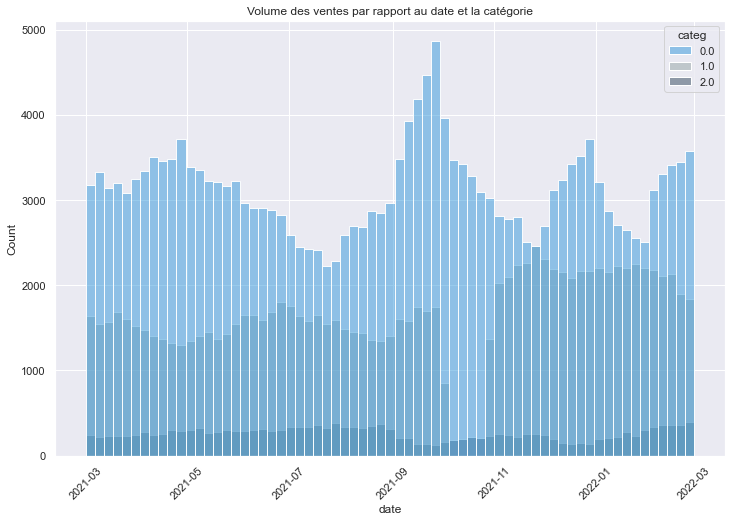

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='date', hue='categ', palette=["#3498db", "#95a5a6", "#34495e"])
plt.xticks(rotation=45)
plt.title('Volume des ventes par rapport au date et la catégorie')
plt.savefig(url + 'histogramme_octobre_avant_suppression.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
octobre = df[(df['date']>='2021-10-01') & (df['date']<='2021-10-31')]

In [41]:
"""
grâce au graphique nous pouvons appercevoire une anomalie au mois d'octobre 
"""
# suppression du mois d'octobre 
len_b = len(df)
df.drop(octobre.index, inplace=True)
print('Mois d\'octobre = ', round(((len_b - len(df)) / len_b * 100), 1), '% du dataset écarté')

Mois d'octobre =  6.1 % du dataset écarté


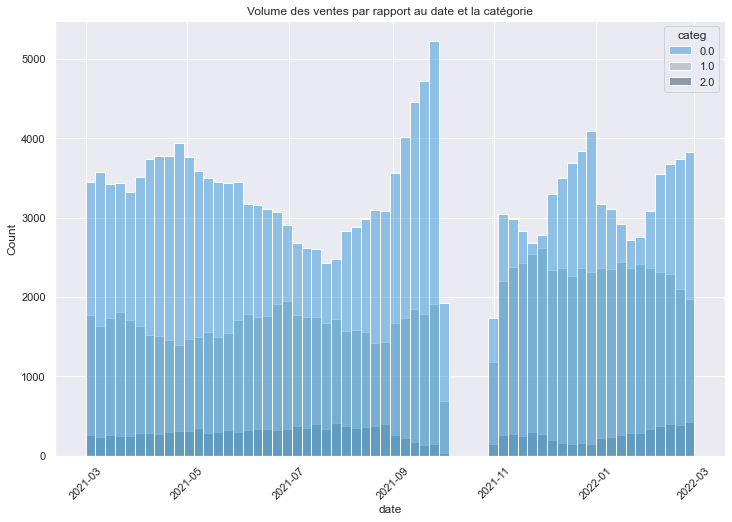

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='date', hue='categ', palette=["#3498db", "#95a5a6", "#34495e"])
plt.xticks(rotation=45)
plt.title('Volume des ventes par rapport au date et la catégorie')
plt.savefig(url + 'histogramme_octobre_apres_suppression.png', dpi=300, bbox_inches='tight')
plt.show()


#### Les valeur manquante 

In [43]:
p_0_2245 = df[df['id_prod']=='0_2245']
p_0_2245

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
6231,6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,NaN,NaN
10797,10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,NaN,NaN
14045,14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,NaN,NaN
17480,17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,NaN,NaN
21071,21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,NaN,NaN
...,...,...,...,...,...,...,...,...,...
322523,322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,NaN,NaN
329226,329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,NaN,NaN
330297,330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,NaN,NaN
335331,335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,NaN,NaN


In [44]:
print('Les valeurs manquantes corresponde à ', round((len(p_0_2245)/len(df)*100), 2), '% du dataframe')

Les valeurs manquantes corresponde à  0.03 % du dataframe


    plusieur choix s'offre a nous pour traité ces valeurs manquantes :
        - supprimer ces valeur (dans notre cas ça n'affectera pas les
        analyse vue que ça ne represente que 0.03 % de tout les valeus 
            
        - faire une imputaiton c'est à dire remplacer ces valeurs
        manquantes par une valeur comme une moyenne, une mediane ou un
        mode

In [45]:
df_test = df.dropna() # sample des commande sans le produit 0_2245

# Conversion en string des 2 premiers caractères de la valeur de 'id_prod'
df_test['id_prod'] = df_test['id_prod'].str[:2]

print('Préfixes de \'id_prod\' :') # Pour chaque catégorie, le préfixe unique de 'id_prod'
for i in df_test['categ'].unique():
    print('- catégorie', i, ':',
        df_test[df.dropna()['categ']==i]['id_prod'].unique())

Préfixes de 'id_prod' :
- catégorie 0.0 : ['0_']
- catégorie 2.0 : ['2_']
- catégorie 1.0 : ['1_']


On peut également déterminer une valeur fixe pour les 2 variables. Pour la catégorie, on peut se fier aux préfixes des identifiants de produits : *0_*, *1_* et *2_*. Ces préfixes correspondent invariablement à la catégorie du produit concerné. On choisit donc *0* comme catégorie du produit *0_2245*.

In [46]:
# remplacement des valeurs manquantes de la variable 'categ' par 0
df['categ'].replace(np.nan, 0, inplace=True)
produit_2245 = df[df['id_prod']=='0_2245']
produit_2245.sample(3)

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
86129,86162,0_2245,2021-08-06 01:51:40.749182,s_71925,c_2039,f,1982,NaN,0.00
162403,162461,0_2245,2022-01-26 13:34:33.440366,s_155484,c_3065,f,1977,NaN,0.00
210463,210524,0_2245,2021-04-18 08:28:11.501497,s_22209,c_3496,f,1957,NaN,0.00


In [47]:
df.drop('index', axis=1, inplace=True)

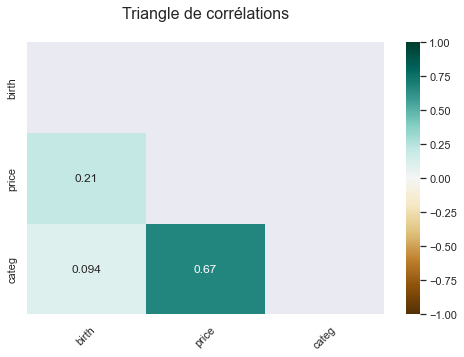

In [48]:
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr(), dtype=np.bool)), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle de corrélations', fontdict={'fontsize':16}, pad=24)
plt.xticks(rotation=45)
plt.savefig(url + 'correlation.png', dpi=300, bbox_inches='tight')
plt.show()

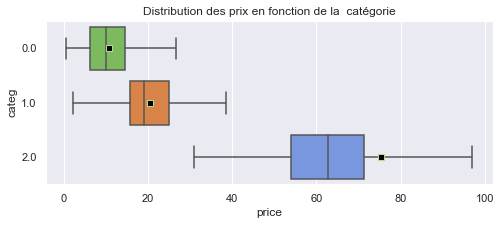

In [49]:
# distibution et moyen des prix en fonction de la catégorie 
plt.figure(figsize=(8,3))
sns.boxplot(data=df, y='categ', x='price', orient='h', showfliers=False, showmeans=True, palette=['#78C850', '#F08030', '#6890F0'], meanprops={"marker":"s","markerfacecolor":"black"})
plt.title('Distribution des prix en fonction de la  catégorie')
plt.savefig(url + 'boxplot_price_categ.png', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
print('Catégorie 0 :',
    '\n- prix moyen :', round(df[df['categ']==0]['price'].mean(), 2), # prix moyen
    '\n- prix médian :', df[df['categ']==0]['price'].median(), # prix médian
    '\n- mode :', df[df['categ']==0]['price'].mode().values[0]) # prix le plus fréquent

Catégorie 0 : 
- prix moyen : 10.65 
- prix médian : 9.99 
- mode : 4.99


on décide de faire une imputation par la médiane pour traité ces valeur manquante

In [51]:
df['price'].replace(np.nan, 9.99, inplace=True)

pour enrichire notre analyse on décide d'ajouter des valeur supplémentaire 

In [52]:
df['mois'] = pd.DatetimeIndex(df['date']).month 

df['date_fixe'] = df['date'].dt.date # Variable temporaire 

df = df.merge(
    df.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'total_ventes'}),
    how='left', on='client_id')

df['ventes_mensuelles'] = round(df['total_ventes'] / 11)

df = df.merge(
    df.pivot_table(
        index=['client_id', 'date_fixe'], 
        values='price', 
        aggfunc='count').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'taille_panier_moyen'}), 
    on='client_id', how='left')

df = df.merge(
    df.pivot_table(
        index=['client_id', 'date_fixe'], 
        values='price').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'panier_moyen'}), 
    on='client_id', how='left').drop('date_fixe', axis=1)


df = df.merge(
    df.pivot_table(
    index='client_id', values='price', 
    aggfunc='sum').reset_index().rename(
    columns={'price': 'total_achats'}),
    on='client_id', how='left')
df.sample(3)

,id_prod,date,session_id,client_id,sex,birth,price,categ,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats
78205,0_1475,2021-08-05 11:48:55.830359,s_71685,c_3398,f,1989,11.99,0.00,8,56,5.00,2.67,13.57,814.92
310458,0_1507,2021-11-02 19:36:27.908434,s_113836,c_1465,m,1979,3.99,0.00,11,26,2.00,3.25,14.57,360.01
81188,0_1035,2021-05-07 17:31:11.389322,s_31257,c_2090,m,2004,3.99,0.00,5,28,3.00,1.75,37.28,"1,026.78"


In [53]:
#age des client 
year = datetime.now().year
df['age']= year - df['birth']

In [54]:
#classification par tranche d'age 
"""
 le découpage peut se faire par tranche d'âge :
 0-3 ans, 4-8 ans, 9-12 ans, 13-17 ans, 18-24 ans, 25-34 ans, 35-44 ans, 45-54 ans, 55-64 ans, 65-74 ans,
 75-84 ans et les 85 ans et plus.
 ou bien plus simplement faire des tranche d'age par décénie:
18-30,
30-40,
40-50,
50-60,
70-80,
80+
"""
df['tranche_age'] = '18-30'
df['tranche_age'].loc[df[df['age']>=30].index] = '30-40'
df['tranche_age'].loc[df[df['age']>=40].index] = '40-50'
df['tranche_age'].loc[df[df['age']>=50].index] = '50-60'
df['tranche_age'].loc[df[df['age']>=60].index] = '60-70'
df['tranche_age'].loc[df[df['age']>=70].index] = '70-80'
df['tranche_age'].loc[df[df['age']>=80].index] = '80et+'

In [98]:
df.sample(10)

,id_prod,date,session_id,client_id,sex,birth,price,categ,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,age,tranche_age,type_client
32524,2_175,2022-01-18 14:04:25.515681,s_151665,c_533,m,2004,60.99,2.00,1,7,1.00,1.75,50.79,358.14,17,18-30,particulier
263161,0_1407,2021-09-02 15:56:25.398271,s_84097,c_3430,f,1973,13.99,0.00,9,133,12.00,2.96,14.10,"1,832.42",48,40-50,particulier
23224,1_282,2021-03-05 17:46:30.067204,s_2183,c_6113,f,1993,23.20,1.00,3,12,1.00,3.00,40.51,380.68,28,18-30,particulier
248648,0_1380,2022-01-08 19:42:29.924784,s_146967,c_8289,f,1973,7.45,0.00,1,20,2.00,2.22,10.42,210.26,48,40-50,particulier
53400,0_1345,2021-05-02 19:09:58.406191,s_28977,c_107,f,1984,17.99,0.00,5,69,6.00,2.56,12.58,886.84,37,30-40,particulier
264551,1_628,2021-12-05 23:52:43.080276,s_130018,c_4114,f,1986,41.37,1.00,12,69,6.00,2.16,12.93,878.86,35,30-40,particulier
126620,0_1532,2021-08-13 14:58:38.539051,s_75231,c_7436,f,1973,17.14,0.00,8,9,1.00,3.00,12.17,93.46,48,40-50,particulier
266874,1_44,2022-02-19 13:56:45.396081,s_167623,c_1077,f,1985,14.49,1.00,2,100,9.00,3.03,13.83,"1,322.76",36,30-40,particulier
201012,0_1453,2021-05-02 03:27:38.970363,s_28680,c_4445,m,1991,7.99,0.00,5,38,3.00,4.75,13.72,528.21,30,30-40,particulier
292652,1_250,2021-07-06 03:21:46.789928,s_58467,c_4429,f,1979,20.76,1.00,7,85,8.00,3.27,16.05,"1,210.89",42,40-50,particulier


# Analyse

In [56]:
# classement des client par nombre total d'achat 
ca = df.pivot_table(
    index='client_id', values=[
        'total_achats','ventes_mensuelles','taille_panier_moyen','total_ventes','panier_moyen']
    ).sort_values(by='total_achats', ascending=False).reset_index()

ca.head(10)

,client_id,panier_moyen,taille_panier_moyen,total_achats,total_ventes,ventes_mensuelles
0,c_1609,12.72,35.41,"151,018.91",11861,"1,078.00"
1,c_4958,55.31,7.42,"137,456.83",2463,224.00
2,c_6714,16.66,12.98,"69,493.36",4193,381.00
3,c_3454,16.62,9.39,"52,845.11",3145,286.00
4,c_8026,13.47,2.88,"2,434.49",184,17.00
5,c_7421,13.58,2.83,"2,406.17",178,16.00
6,c_7319,13.57,2.75,"2,366.20",168,15.00
7,c_3263,13.82,3.05,"2,346.34",177,16.00
8,c_8392,13.76,2.76,"2,332.08",171,16.00
9,c_2899,53.69,1.62,"2,313.54",47,4.00


In [57]:
# Création d'une variable 'Type' de client (2 modalités : particulier ou professionnel)
df['type_client'] = 'particulier'
df['type_client'].loc[df[df['client_id'].isin(ca.head(4)['client_id'])].index] = 'pro'


pro = df[df['type_client']=='pro']
part = df[df['type_client']=='particulier']
df.sample(3)

,id_prod,date,session_id,client_id,sex,birth,price,categ,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,age,tranche_age,type_client
45033,0_1448,2022-01-02 13:14:04.186173,s_143876,c_614,m,1967,18.94,0.00,1,33,3.00,1.83,16.89,551.27,54,50-60,particulier
96586,1_554,2022-02-16 20:23:46.556403,s_166249,c_4182,m,1989,43.09,1.00,2,134,12.00,2.63,12.25,"1,665.57",32,30-40,particulier
201653,1_260,2021-06-20 11:24:10.770839,s_51279,c_6506,f,1988,17.63,1.00,6,35,3.00,2.69,15.07,445.42,33,30-40,particulier


In [58]:
print('les clients pro représente ', round(pro['price'].sum()/df['price'].sum()*100, 2), '% du chiffre d\' affaires annuel')

les clients pro représente  7.48 % du chiffre d' affaires annuel


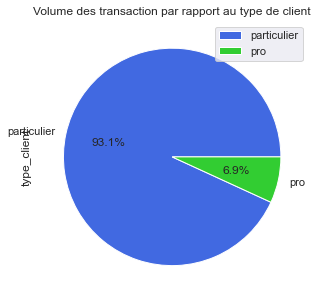

In [59]:
plt.figure(figsize=(5,5))
df['type_client'].value_counts(normalize=True).plot(kind='pie',legend=True,autopct='%1.1f%%', colors=['royalblue', 'limegreen'])
plt.title('Volume des transaction par rapport au type de client')
plt.savefig(url + 'pieplot_volume_transac_client-type.png', dpi=300, bbox_inches='tight')
plt.show()

Incide de Gini : 0.44006332817649363


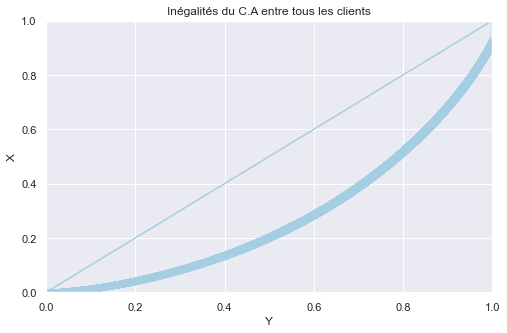

In [60]:
lorenz(ca['total_achats'], 'Inégalités du C.A entre tous les clients')

Incide de Gini : 0.3954957023823287


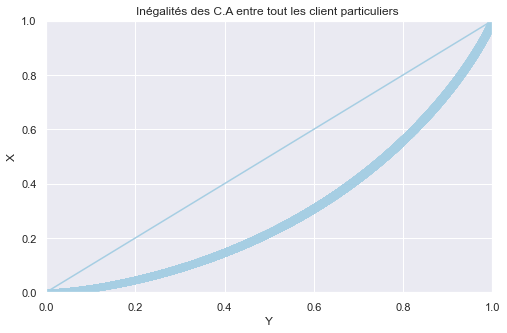

In [61]:
lorenz(part.pivot_table(index='client_id')['total_achats'], 'Inégalités des C.A entre tout les client particuliers ')

Nous allons faire un analyse en deux axe 
    
    - client pro 
    - client particulier 

### Analyse client pro 

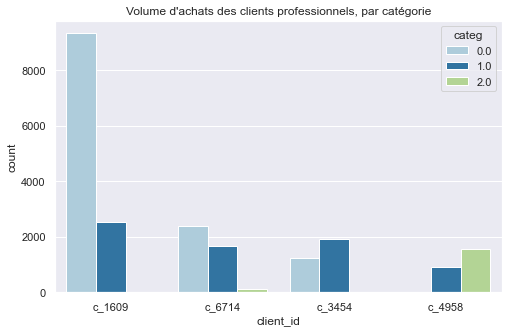

In [62]:
sns.countplot(data=pro, x='client_id', hue='categ')
plt.title('Volume d\'achats des clients professionnels, par catégorie')
plt.savefig(url + 'volume_client_pro.png', dpi=300, bbox_inches='tight')
plt.show()

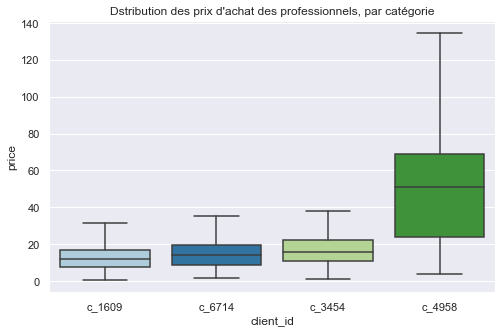

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(data=pro, y='price', x='client_id', showfliers=False)
plt.title('Dstribution des prix d\'achat des professionnels, par catégorie')
plt.savefig(url + 'boxplot_price_categ_pro.png', dpi=300, bbox_inches='tight')
plt.show()

Client c_1609


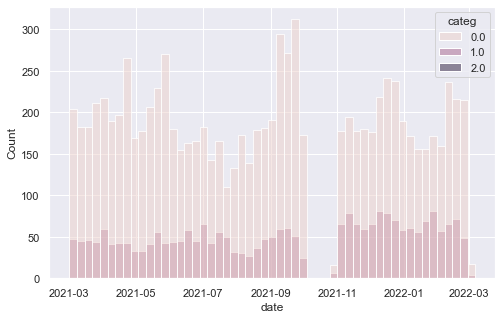

Client c_6714


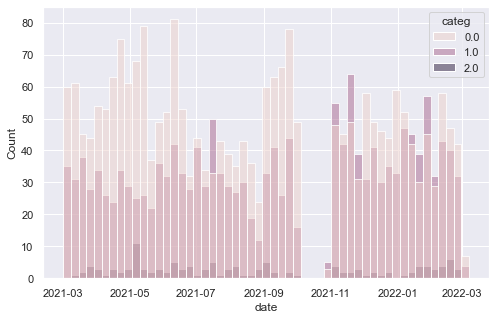

Client c_3454


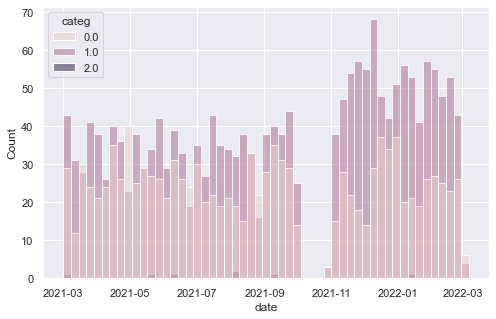

Client c_4958


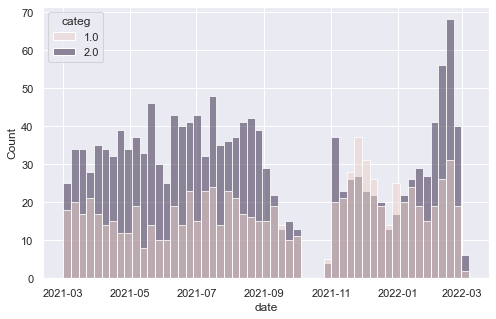

In [64]:
for i in pro['client_id'].unique():
    print('Client', i)
    plt.figure(figsize=(8,5))
    sns.histplot(data=pro[pro['client_id']==i], x='date', hue='categ', binwidth=7)
    plt.savefig(url+ f'{i}.png', dpi=300, bbox_inches='tight')
    plt.show()

### Analyse client particulier 

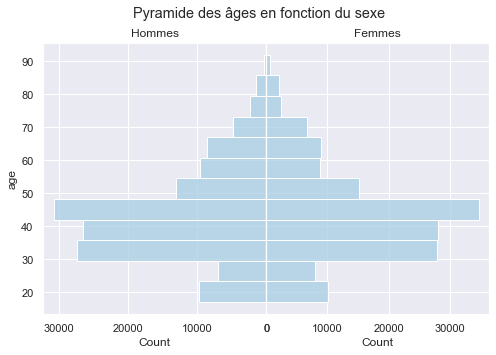

In [65]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges en fonction du sexe')

sns.histplot(ax=axes[0], y=part[part['sex']=='m']['age'], bins=12)
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=part[part['sex']=='f']['age'], bins=12)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(url + 'pyramide_age_sexe.png', dpi=300, bbox_inches='tight')
plt.show()

#### Remarque : 
    la pyramide des âges ne montre aucune difference entre les homme
    et les femme 
    la pérodicité des vente est quasiment la même pour les deux sex 

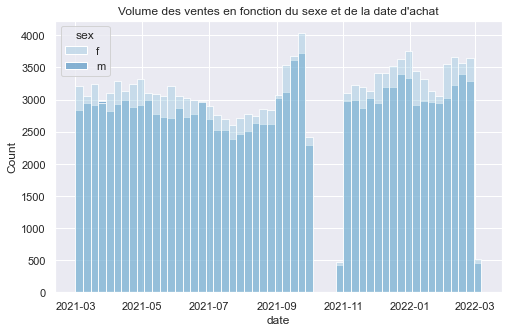

In [66]:
plt.figure(figsize=(8,5))
sns.histplot(data=part, x='date', hue='sex', binwidth=7)
plt.title('Volume des ventes en fonction du sexe et de la date d\'achat')
plt.savefig(url + 'volume_vente_sexe_date.png', dpi=300, bbox_inches='tight')
plt.show()

### Remarque :
    le volume des ventes est légèrement plus élevé chez les femme 

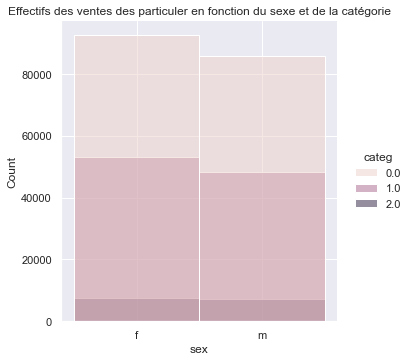

In [67]:
sns.displot(data=part, x='sex', hue='categ')
plt.title('Effectifs des ventes des particuler en fonction du sexe et de la catégorie')
plt.savefig(url + 'displot_sexe_categ.png', dpi=300, bbox_inches='tight')
plt.show()

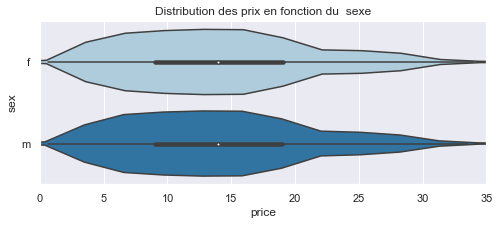

In [68]:
plt.figure(figsize=(8,3))
sns.violinplot(data=part, x='price', y='sex', showfliers=False, showmeans=True)
plt.xlim([0,35])
plt.title('Distribution des prix en fonction du  sexe')
plt.savefig(url + 'violinplot_price_sexe.png', dpi=300, bbox_inches='tight')
plt.show()

In [69]:
part = pd.concat([part,
    pd.get_dummies(part['sex'], drop_first=True).rename(columns={'m': 'sex_code'})],
    axis=1)
part.sample(3)

,id_prod,date,session_id,client_id,sex,birth,price,categ,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,age,tranche_age,type_client,sex_code
131030,1_618,2021-03-22 16:47:43.542175,s_9977,c_3440,m,1967,29.36,1.00,3,27,2.00,1.59,17.43,501.22,54,50-60,particulier,1
70572,1_617,2021-03-01 15:00:19.706597,s_313,c_7387,m,1954,14.99,1.00,3,40,4.00,1.33,17.17,647.10,67,60-70,particulier,1
21244,0_1617,2022-01-19 08:20:27.662442,s_152038,c_2504,m,1976,11.99,0.00,1,41,4.00,3.15,14.89,563.73,45,40-50,particulier,1


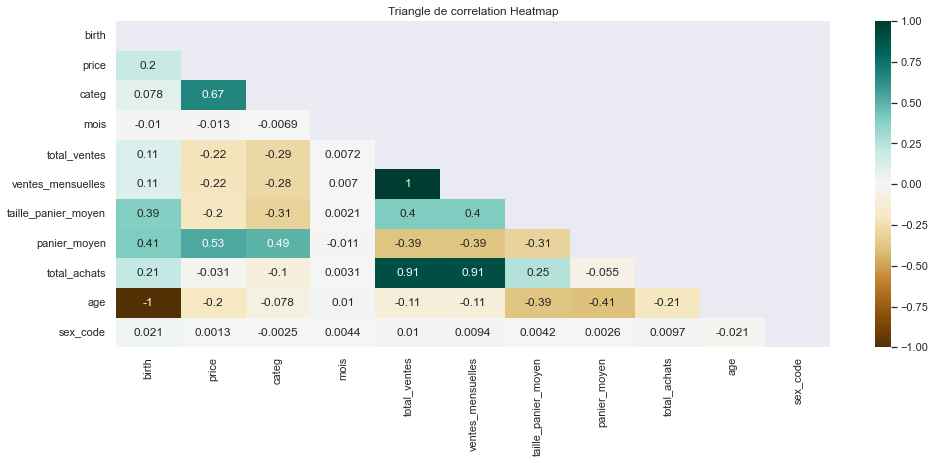

In [70]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(
    part.corr(),
    mask=np.triu(np.ones_like(part.corr(), dtype=np.bool)),
    vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle de correlation Heatmap')
plt.savefig(url + 'correlation_sex_code.png', dpi=300, bbox_inches='tight')
plt.show()

### Remarque:
    on a fait une matrice de corrélations qui nous montre l'absence
    de relation entre le sexe et toutes les autre variable 

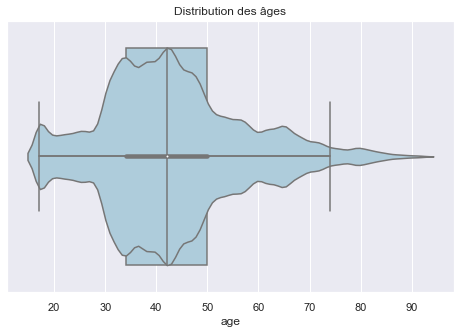

In [71]:
sns.boxplot(data=part, x='age', showfliers=False)
sns.violinplot(data=part, x='age', showfliers=False)
plt.title('Distribution des âges')
plt.savefig(url + 'dist_age.png', dpi=300, bbox_inches='tight')
plt.show()

### Remarque:
    les 30-50 ans on réaliser plus de la moitié des ventes.

<Figure size 576x360 with 0 Axes>

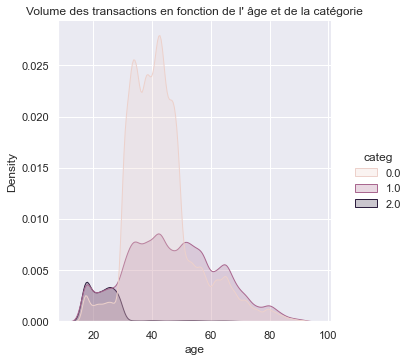

In [72]:
plt.figure(figsize=(8,5))
sns.displot(data=part, x='age', hue='categ', kind='kde', fill=True)
plt.title('Volume des transactions en fonction de l\' âge et de la catégorie')
plt.savefig(url + 'distplot_age_categ.png', dpi=300, bbox_inches='tight')
plt.show()

### Remarque : 
    les 3 catégorie sont achèter par toutes les tranche d'age  
    les moins de 30 ans n'achète quasiment que des produit de 
    la catégorie 2
    les 30-50 achète principalement des produit de la catégorie 0

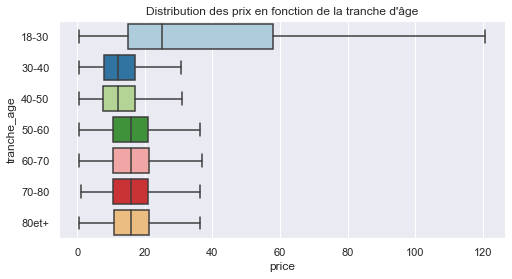

In [73]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df.sort_values(by='tranche_age'), y='tranche_age', x='price', showfliers=False)
plt.title('Distribution des prix en fonction de la tranche d\'âge')
plt.savefig(url + 'boxplot_price_tranche-age.png', dpi=300, bbox_inches='tight')
plt.show()

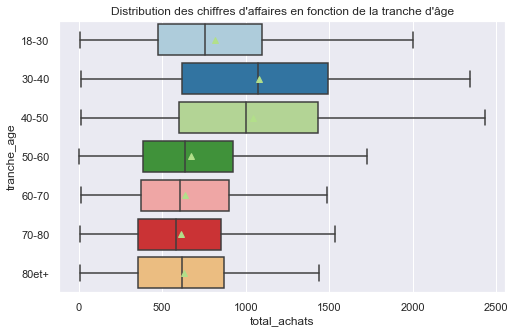

In [74]:
sns.boxplot(data=part.sort_values(by='tranche_age'), 
            y='tranche_age', x='total_achats', 
            showfliers=False, showmeans=True)
plt.title('Distribution des chiffres d\'affaires en fonction de la tranche d\'âge')
plt.savefig(url + 'boxplot_ca_tranche_age.png', dpi=300, bbox_inches='tight')
plt.show()

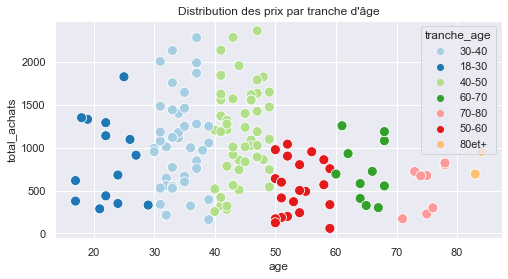

In [75]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=part.sample(150), x='age', y='total_achats', hue='tranche_age', s=100)
plt.title('Distribution des prix par tranche d\'âge')
plt.savefig(url + 'scatterplot_price_tranche_age.png', dpi=300, bbox_inches='tight')
plt.show()

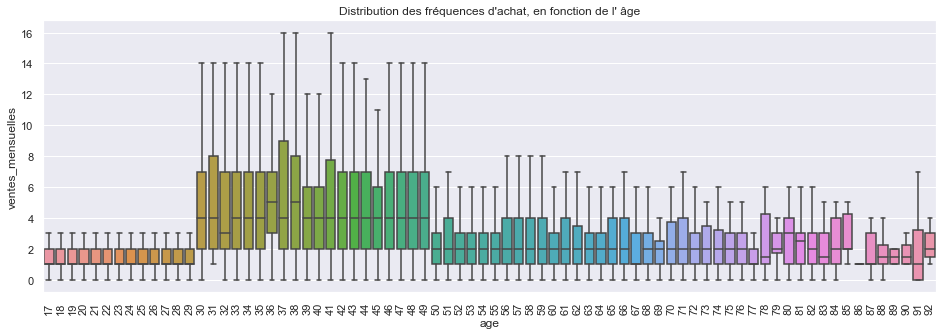

In [76]:
plt.figure(figsize=(16,5))
sns.boxplot(
    data=part.pivot_table(index=['client_id']),
    y='ventes_mensuelles', x='age', showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribution des fréquences d\'achat, en fonction de l\' âge')
plt.savefig(url + 'boxplot_age_freq_achat.png', dpi=300, bbox_inches='tight')
plt.show()

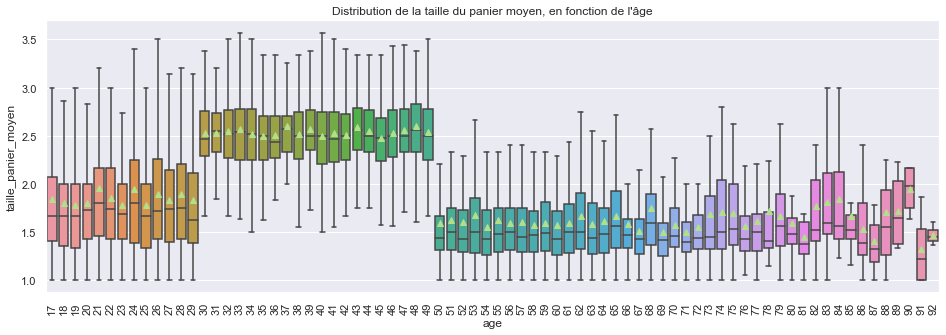

In [77]:
plt.figure(figsize=(16,5))
sns.boxplot(
    data=part.pivot_table(index=['client_id']),
    y='taille_panier_moyen', x='age', showfliers=False, showmeans=True)
plt.xticks(rotation=90)
plt.title('Distribution de la taille du panier moyen, en fonction de l\'âge')
plt.savefig(url + 'boxplot_taille_panier_age.png', dpi=300, bbox_inches='tight')
plt.show()

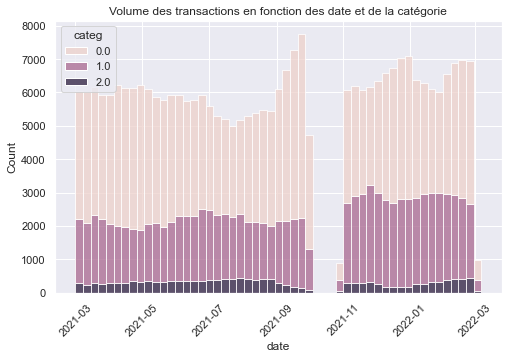

In [78]:
plt.figure(figsize=(8,5))
sns.histplot(data=part, x='date', hue='categ', multiple='stack', binwidth=7)
plt.xticks(rotation=45)
plt.title('Volume des transactions en fonction des date et de la catégorie')
plt.savefig(url+ 'histplot_date_categorie.png', dpi=300, bbox_inches='tight')
plt.show()

Catégorie 0.0


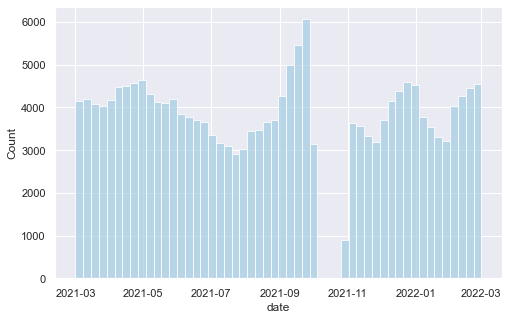

Catégorie 1.0


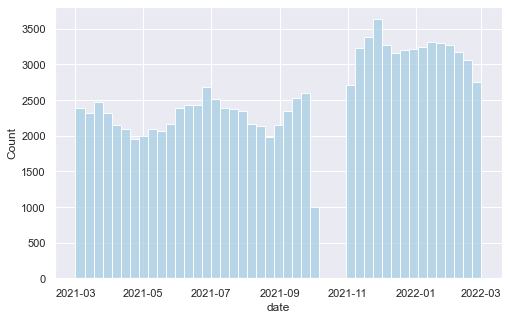

Catégorie 2.0


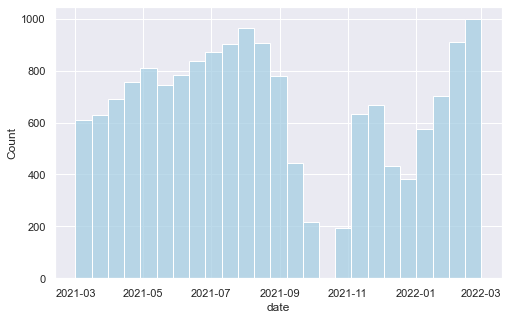

In [79]:
for i in sorted(df['categ'].unique()):
    print('Catégorie', i)
    sns.histplot(data=df[df['categ']==i], x='date')
    plt.show()

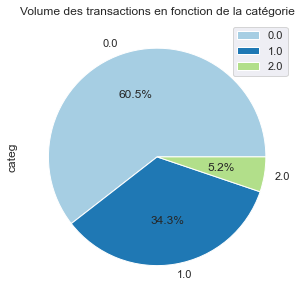

In [80]:
df['categ'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Volume des transactions en fonction de la catégorie')
plt.savefig(url + 'pieplot_transac_categ.png', dpi=300, bbox_inches='tight')
plt.show()

les 10  livres avec le plus chiffres d'affaires annuels

In [81]:
df.pivot_table(index=['id_prod', 'categ'], aggfunc={'price': np.sum}).sort_values(by='price', ascending=False).reset_index().head(10)

,id_prod,categ,price
0,2_135,2.00,"32,011.36"
1,2_112,2.00,"29,392.95"
2,2_102,2.00,"27,263.54"
3,2_209,2.00,"25,826.31"
4,1_369,1.00,"25,669.30"
5,1_395,1.00,"25,569.18"
6,2_110,2.00,"25,086.75"
7,1_383,1.00,"24,670.49"
8,1_414,1.00,"24,235.11"
9,2_166,2.00,"24,154.20"


Incide de Gini : 0.7414531166305374


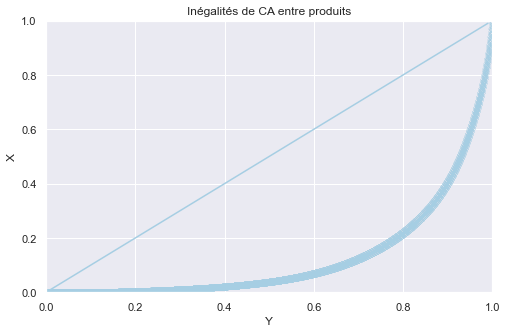

In [82]:
lorenz(df.pivot_table(index='id_prod', aggfunc='sum')['price'], 'Inégalités de CA entre produits')

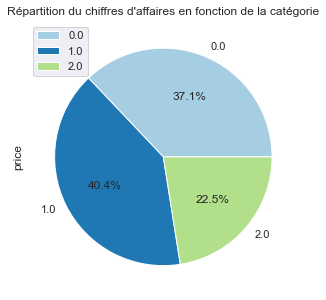

In [83]:
data=df.pivot_table(index='categ', aggfunc={'price': np.sum}).plot(
    kind='pie', y='price',
    legend=True,
    autopct='%1.1f%%'
)
plt.title('Répartition du chiffres d\'affaires en fonction de la catégorie')
plt.savefig(url + 'pieplot_ca_categ.png', dpi=300, bbox_inches='tight')
plt.show()

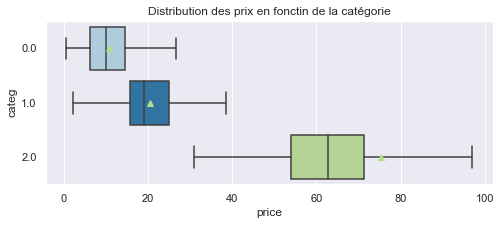

In [84]:
plt.figure(figsize=(8,3))
sns.boxplot(
    data=df, y='categ', x='price', 
    showmeans=True, showfliers=False, orient='h')
plt.title('Distribution des prix en fonctin de la catégorie')
plt.savefig(url + 'boxplot_price_categ_means.png', dpi=300, bbox_inches='tight')
plt.show()

In [85]:
for i in sorted(df['categ'].unique()):
    print('Catégorie', i)
    print(pd.Series(df[df['categ']==i]['price'].describe()), '\n')

Catégorie 0.0
count   191,326.00
mean         10.65
std           4.93
min           0.62
25%           6.30
50%           9.99
75%          14.45
max          40.99
Name: price, dtype: float64 

Catégorie 1.0
count   108,411.00
mean         20.49
std           7.58
min           2.00
25%          15.81
50%          19.08
75%          24.98
max          80.99
Name: price, dtype: float64 

Catégorie 2.0
count   16,433.00
mean        75.25
std         39.19
min         30.99
25%         53.99
50%         62.83
75%         71.21
max        300.00
Name: price, dtype: float64 



# Test statistique

### ANOVA :
on va utiliser l'analyse de la variance pour vérifer la corrélation entre une valeur qualitative et une valeur quantitative.


test sur l'age et la catégorie

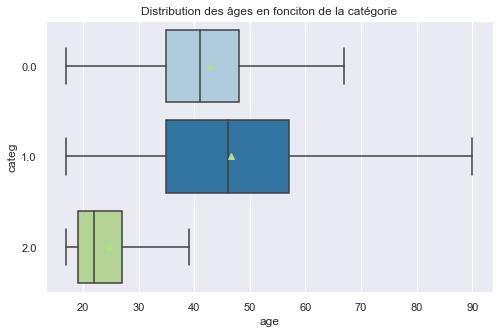

In [86]:
sns.boxplot(data=df, x='age', y='categ', orient='h', showfliers=False, showmeans=True)
plt.title('Distribution des âges en fonciton de la catégorie')
plt.savefig(url + 'boxplot_age_categ.png', dpi=300, bbox_inches='tight')
plt.show()

In [87]:
df.groupby('categ').mean()['age']

categ
0.00   42.91
1.00   46.65
2.00   24.71
Name: age, dtype: float64

moyenne des prix en fonciton de la catégorie 

In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# ANOVA
sample_df = df.sample(5000)
model = smf.ols('age ~ categ', data=sample_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
p = anova_table['PR(>F)'][0]
print('ANOVA\np-value :', p, '\nstat (F) :', anova_table['F'][0])
if p > 0.05:
    print('H0: the means of the samples are equal.')
else:
    print('H1: one or more of the means of the samples are unequal.'
         '\n\nConditions :'
         '\n1. Normalité des résidus\n2. Homoscédasticité')

ANOVA
p-value : 4.103814611026787e-11 
stat (F) : 43.75850007820697
H1: one or more of the means of the samples are unequal.

Conditions :
1. Normalité des résidus
2. Homoscédasticité


Normalité des résidus (Shapiro)

stats : 0.9664005041122437 
p-value : 1.25626535946637e-32
H0 rejetée : distribution probablement pas normale


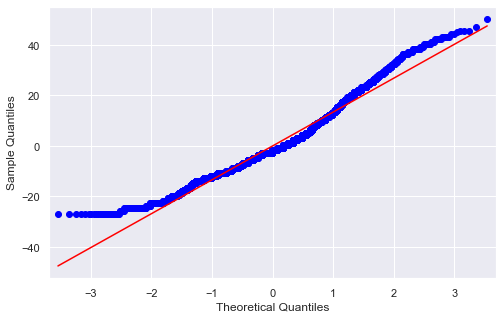

In [89]:
from statsmodels.graphics.gofplots import qqplot

# Test de Shapiro sur les résidus
print('Normalité des résidus (Shapiro)')
print('\nstats :', stats.shapiro(model.resid)[0],
    '\np-value :', stats.shapiro(model.resid)[1])
if p>.05:
    print('H0 acceptée : distribution normale')
else:
    print('H0 rejetée : distribution probablement pas normale')
qqplot(model.resid, line='s')
plt.savefig(url+ 'qqplot1.png', dpi=300,bbox_inches='tight')
plt.show()

Normalité des résidus après boxcox :
stats : nan 
p-value : 1.0
H0 acceptée : distribution normale


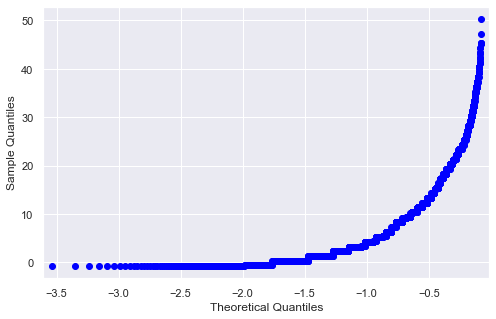

In [90]:
from scipy.special import boxcox1p

# Test de Shapiro sur les résidus après boxcox
residus = boxcox1p(model.resid, 1)
p = stats.shapiro(residus)[1]
print('Normalité des résidus après boxcox :'
    '\nstats :', stats.shapiro(residus)[0],
    '\np-value :', p)
if p>.05:
    print('H0 acceptée : distribution normale')
else:
    print('H0 rejetée : distribution probablement pas normale')
qqplot(residus, line='s')
plt.savefig(url+ 'qqplot2.png', dpi=300,bbox_inches='tight')
plt.show()

In [91]:
# Test de Levene sur les 3 catégories
samples = 4000
a = df[df['categ']==0]['age'].sample(samples).values
b = df[df['categ']==1]['age'].sample(samples).values
c = df[df['categ']==2]['age'].sample(samples).values
stat, p = stats.levene(a, b, c)
print('Condition 2 : homoscédasticité (Levene)',
    '\nstats :', stat,
    '\np-value :', p)
if p > 0.05:
    print('H0: les variances sont égales')
else:
    print('H1: les variances ne sont pas égales (essayer Welch ANOVA)')
print('\nConditions :'
      '\n- The samples from the populations under consideration are independent',
      '\n- The populations under consideration are approximately normally distributed')   

Condition 2 : homoscédasticité (Levene) 
stats : 713.8173525611193 
p-value : 1.2426122206759271e-293
H1: les variances ne sont pas égales (essayer Welch ANOVA)

Conditions :
- The samples from the populations under consideration are independent 
- The populations under consideration are approximately normally distributed


In [92]:
# Test de Welch entre catégorielle et quantitative
stat, p = stats.ttest_ind(sample_df['age'], sample_df['categ'])
print('Test de Welch (si absence d\'homoscédasticité)\n')
print('p-value :', p, '\nstat :', stat)
if p > 0.05:
    print('H0: les moyennes des échantillons sont égales')
else:
    print('H1: une ou plus des moyennes des échantillons sont inégales')

Test de Welch (si absence d'homoscédasticité)

p-value : 0.0 
stat : 221.89894463252986
H1: une ou plus des moyennes des échantillons sont inégales


### Chi 2 (catégorie et sexe)

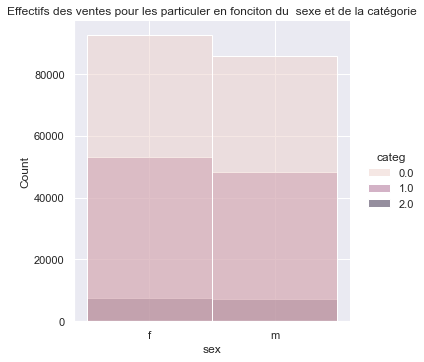

In [93]:
sns.displot(data=part, x='sex', hue='categ')
plt.title('Effectifs des ventes pour les particuler en fonciton du  sexe et de la catégorie')
plt.show()

In [94]:
# pour la table de contingence utiliser pd.crosstable pour la part
crosstab = pd.crosstab(part['categ'], part['sex'], margins=False)
crosstab

sex,f,m
categ,,
0.00,92617,85774
1.00,53161,48221
2.00,7599,7136


In [95]:
# importer researchy pour utilise la table de contingence normalisée
import researchpy as rp 

table, results = rp.crosstab(part['categ'], part['sex'], prop = 'col',test='chi-square')
table

sex              
sex        f      m    All
categ                     
0.0    60.39  60.78  60.57
1.0    34.66  34.17  34.42
2.0     4.95   5.06   5.00
All   100.00 100.00 100.00

<function matplotlib.pyplot.show(close=None, block=None)>

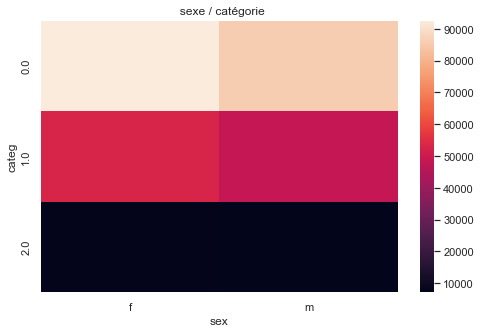

In [96]:
sns.heatmap(crosstab)
plt.title('  sexe / catégorie')
plt.savefig(url + 'crosstab_heatmap.png', dpi=300, bbox_inches='tight')
plt.show

In [97]:
# Test de Chi 2
sample_df = part.sample(1500)
table = pd.crosstab(sample_df['categ'], sample_df['sex'], margins=False)
stat, p, dof, expected = stats.chi2_contingency(table)
print('Test de Chi 2 (2 catégorielles)')
print('Stat = %.3f\np-value = %.35f' % (stat, p))
if p > .05:
    print('H0: the two samples are independent')
else:
    print('H1: there is a dependency between the samples.')
print('\nConditions :\n'
      '- Observations used in the calculation of the contingency table are independent.',
      '\n- 25 or more examples in each cell of the contingency table.')

Test de Chi 2 (2 catégorielles)
Stat = 2.934
p-value = 0.23060187025328188203943113876448479
H0: the two samples are independent

Conditions :
- Observations used in the calculation of the contingency table are independent. 
- 25 or more examples in each cell of the contingency table.
